<a href="https://colab.research.google.com/github/FranziskoB/Exemplo1_cluters/blob/main/R_Clusters_Exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando bibliotecas

In [ ]:
if(!"kableExtra" %in% installed.packages()){
    install.packages("kableExtra")}
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools")}
if(!"plot3D" %in% installed.packages()){
    install.packages("plot3D")}
if(!"plotly" %in% installed.packages()){
    install.packages("plotly")}   
if(!"reshape2" %in% installed.packages()){
    install.packages("reshape2")} 
if(!"cluster" %in% installed.packages()){
    install.packages("cluster")} 
if(!"factoextra" %in% installed.packages()){
    install.packages("factoextra")} 
library(reshape2)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(plot3D)
library(plotly)
library(htmltools)
library(cluster)
library(factoextra)

##Carregamento da base de dados (Vestibular)

In [4]:
load(url("https://github.com/FranziskoB/Exemplo1_cluters/blob/main/dados/Vestibular.RData?raw=true"))

Visualização da base de dados

In [5]:
head(Vestibular, n=5)

estudante,matematica,fisica,quimica
<chr>,<dbl>,<dbl>,<dbl>
Gabriela,3.7,2.7,9.1
Luiz Felipe,7.8,8.0,1.5
Patricia,8.9,1.0,2.7
Ovidio,7.0,1.0,9.0
Leonor,3.4,2.0,5.0


##Construindo uma tabela com os dados

In [6]:
tabela<-kable(Vestibular) %>%
kable_styling(bootstrap_options = "striped", 
                full_width = FALSE,
                font_size = 20)  
                
display_html(HTML(tabela))

estudante,matematica,fisica,quimica
Gabriela,3.7,2.7,9.1
Luiz Felipe,7.8,8.0,1.5
Patricia,8.9,1.0,2.7
Ovidio,7.0,1.0,9.0
Leonor,3.4,2.0,5.0


##Gráfico 3D com scatter

Warning message:
“Setting row names on a tibble is deprecated.”


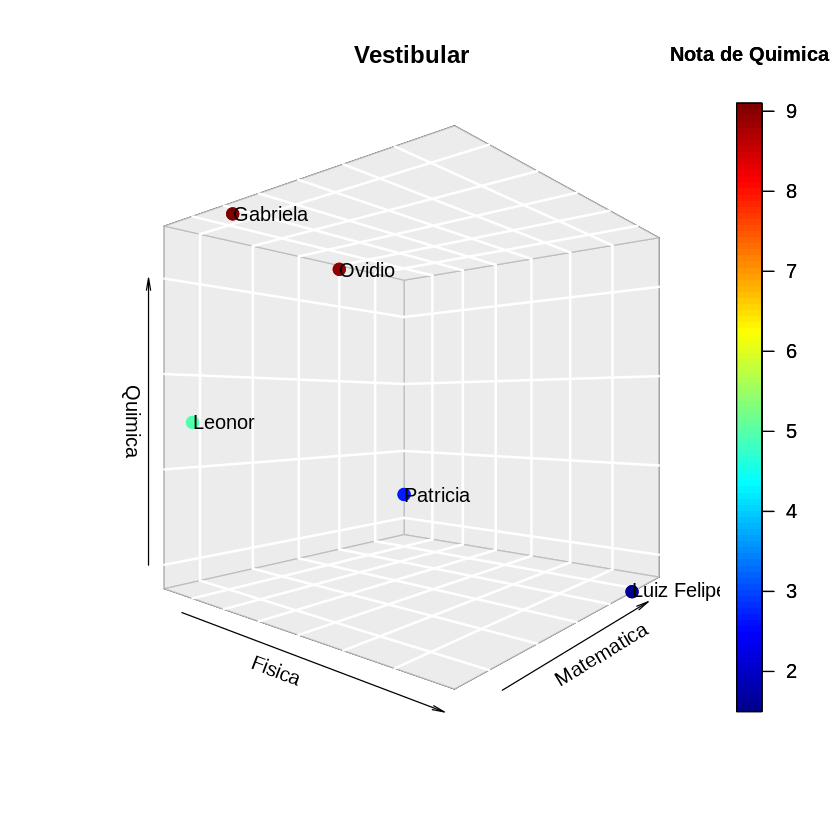

In [8]:
rownames(Vestibular) <- Vestibular$estudante
scatter3D(x=Vestibular$fisica,
          y=Vestibular$matematica,
          z=Vestibular$quimica,
          phi = 0, bty = "g", pch = 20, cex = 2,
          xlab = "Fisica",
          ylab = "Matematica",
          zlab = "Quimica",
          main = "Vestibular",
          clab = "Nota de Quimica") %>%
text3D(x=Vestibular$fisica,
         y=Vestibular$matematica,
         z=Vestibular$quimica,
         labels = rownames(Vestibular),
         add = TRUE, cex = 1)

##Estatísticas descritivas

In [9]:
summary(Vestibular)

  estudante           matematica       fisica        quimica    
 Length:5           Min.   :3.40   Min.   :1.00   Min.   :1.50  
 Class :character   1st Qu.:3.70   1st Qu.:1.00   1st Qu.:2.70  
 Mode  :character   Median :7.00   Median :2.00   Median :5.00  
                    Mean   :6.16   Mean   :2.94   Mean   :5.46  
                    3rd Qu.:7.80   3rd Qu.:2.70   3rd Qu.:9.00  
                    Max.   :8.90   Max.   :8.00   Max.   :9.10  

Se for necessário padronizar, é possível utilizar a função scale()

In [10]:
vest_padronizado <- as.data.frame(scale(Vestibular[,2:4]))
rownames(vest_padronizado) <- Vestibular$estudante

Boxplots por variável

In [ ]:
ax<-(
  Vestibular %>%
    melt() %>%
    ggplot(aes(label = estudante)) +
    geom_boxplot(aes(x = variable, y = value, fill = variable)) +
    geom_point(aes(x = variable, y = value), alpha = 0.5) +
    labs(x = "Variável",
         y = "Nota") +
    scale_fill_manual("Legenda:",
                      values = c("orange", "purple", "bisque4")) +
    theme_bw()
)


#Esquema de aglomeração hierárquico

Matriz de dissimilaridades

In [13]:
matriz_D <- Vestibular %>% 
  select(matematica, fisica, quimica) %>% 
  dist(method = "euclidean")

Method: parametrização da distância a ser utilizada

*   "euclidean": distância euclidiana
*   "euclidiana quadrática": elevar ao quadrado matriz_D (matriz_D^2)
*   "maximum": distância de Chebychev;
*   "manhattan": distância de Manhattan (ou distância absoluta ou bloco);
*   "canberra": distância de Canberra;
*   "minkowski": distância de Minkowski

Visualizando a matriz de dissimilaridades

In [16]:
viz=data.matrix(matriz_D) %>% 
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE, 
                font_size = 20)
display_html( HTML(viz))

1,2,3,4,5
0.000000,10.132127,8.419620,3.713489,4.170132
10.132127,0.000000,7.186793,10.290287,8.222530
8.419620,7.186793,0.000000,6.580273,6.044832
3.713489,10.290287,6.580273,0.000000,5.473573
4.170132,8.222530,6.044832,5.473573,0.000000


Elaboração da clusterização hierárquica

In [21]:
cluster_hier <- agnes(x = matriz_D, method = "single")

Method é o tipo de encadeamento:


*   "average": encadeamento médio (between groups ou average linkage)
*   "single": encadeamento único (nearest neighbor ou single linkage)
*   "complete": encadeamento completo (furthest neighbor ou complete linkage)


Definição do esquema hierárquico de aglomeração

As distâncias para as combinações em cada estágio

In [22]:
coeficientes <- sort(cluster_hier$height, decreasing = FALSE) 
coeficientes

[1] 3.713489 4.170132 6.044832 7.186793

Tabela com o esquema de aglomeração. Interpretação do output:

*   As linhas são os estágios de aglomeração
*   Nas colunas Cluster1 e Cluster2, observa-se como ocorreu a junção
*   Quando for número negativo, indica observação isolada
*   Quando for número positivo, indica cluster formado anteriormente (estágio)
*   Coeficientes: as distâncias para as combinações em cada estágio

In [23]:
esquema <- as.data.frame(cbind(cluster_hier$merge, coeficientes))
names(esquema) <- c("Cluster1", "Cluster2", "Coeficientes")
esquema

Cluster1,Cluster2,Coeficientes
<dbl>,<dbl>,<dbl>
-1,-4,3.713489
1,-5,4.170132
2,-3,6.044832
3,-2,7.186793


Visualização do esquema hierárquico de aglomeração

In [25]:
viz<-esquema %>%
  kable(row.names = T) %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE, 
                font_size = 20)
display_html( HTML(viz) )

,Cluster1,Cluster2,Coeficientes
1,-1,-4,3.713489
2,1,-5,4.170132
3,2,-3,6.044832
4,3,-2,7.186793


Construção do dendrograma

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


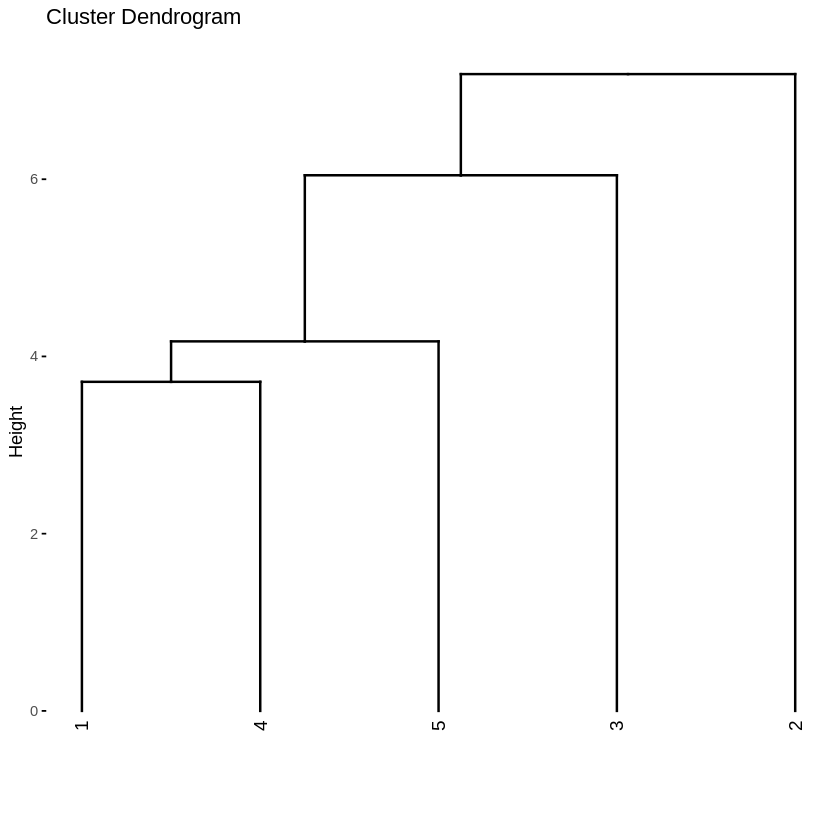

In [32]:
fviz_dend(x = cluster_hier)

Dendrograma com visualização dos clusters (definição de 3 clusters)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


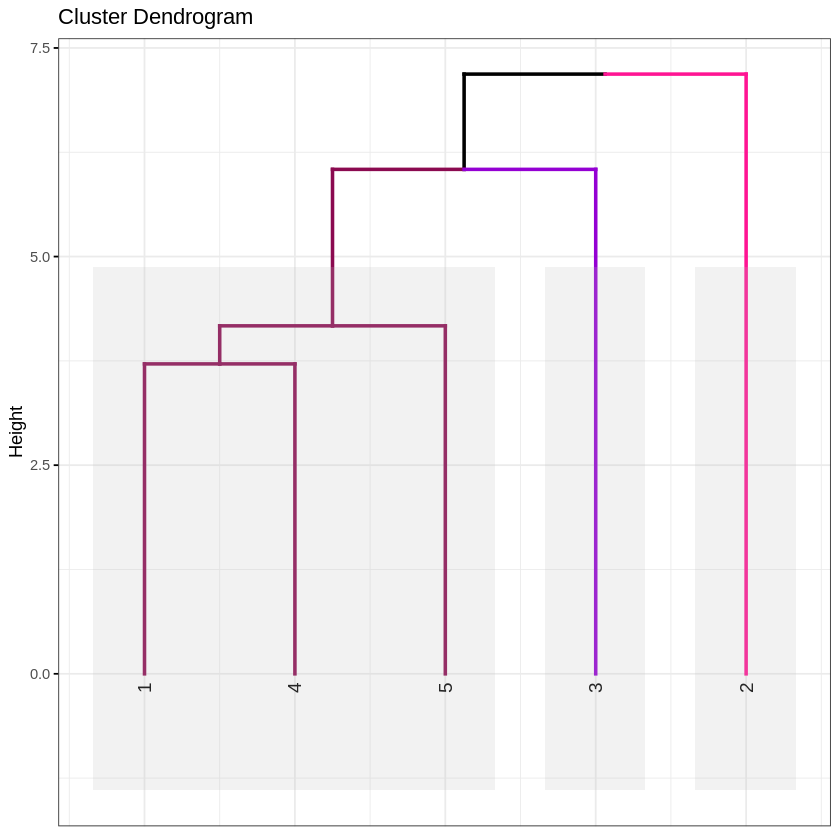

In [33]:
fviz_dend(x = cluster_hier,
          k = 3,
          k_colors = c("deeppink4", "darkviolet", "deeppink"),
          color_labels_by_k = F,
          rect = T,
          rect_fill = T,
          lwd = 1,
          ggtheme = theme_bw())

Criando variável categórica para indicação do cluster no banco de dados

O argumento 'k' indica a quantidade de clusters

In [35]:
Vestibular$cluster_H <- factor(cutree(tree = cluster_hier, k = 3))

In [39]:
Vestibular

estudante,matematica,fisica,quimica,cluster_H
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Gabriela,3.7,2.7,9.1,1
Luiz Felipe,7.8,8.0,1.5,2
Patricia,8.9,1.0,2.7,3
Ovidio,7.0,1.0,9.0,1
Leonor,3.4,2.0,5.0,1


Estatísticas descritivas dos clusters por variável

In [46]:
group_by(Vestibular, cluster_H) %>%
  summarise(
    mean = mean(matematica, na.rm = TRUE),
    sd = sd(matematica, na.rm = TRUE),
    min = min(matematica, na.rm = TRUE),
    max = max(matematica, na.rm = TRUE))

cluster_H,mean,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.7,1.997498,3.4,7.0
2,7.8,NA,7.8,7.8
3,8.9,NA,8.9,8.9


Estatísticas descritivas da variável 'fisica'

In [47]:

group_by(Vestibular, cluster_H) %>%
  summarise(
    mean = mean(fisica, na.rm = TRUE),
    sd = sd(fisica, na.rm = TRUE),
    min = min(fisica, na.rm = TRUE),
    max = max(fisica, na.rm = TRUE))

cluster_H,mean,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.9,0.8544004,1,2.7
2,8.0,NA,8,8.0
3,1.0,NA,1,1.0


Estatísticas descritivas da variável 'quimica'

In [48]:
group_by(Vestibular, cluster_H) %>%
  summarise(
    mean = mean(quimica, na.rm = TRUE),
    sd = sd(quimica, na.rm = TRUE),
    min = min(quimica, na.rm = TRUE),
    max = max(quimica, na.rm = TRUE))

cluster_H,mean,sd,min,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.7,2.338803,5.0,9.1
2,1.5,NA,1.5,1.5
3,2.7,NA,2.7,2.7


Análise de variância de um fator (ANOVA). Interpretação do output:
*   Mean Sq do cluster_H: indica a variabilidade entre grupos
*   Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
*   F value: estatística de teste (Sum Sq do cluster_H / Sum Sq dos Residuals)
*   Pr(>F): p-valor da estatística 
*   p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais
*   A variável mais discriminante dos grupos contém maior estatística F (e significativa)



ANOVA da variável 'matematica'

In [54]:
summary(anova_matematica <- aov(formula = matematica ~ cluster_H,
                                data = Vestibular))

            Df Sum Sq Mean Sq F value Pr(>F)
cluster_H    2  16.59   8.296   2.079  0.325
Residuals    2   7.98   3.990               

ANOVA da variável 'fisica'

In [50]:
summary(anova_fisica <- aov(formula = fisica ~ cluster_H,
                            data = Vestibular))

            Df Sum Sq Mean Sq F value Pr(>F)  
cluster_H    2  32.61   16.31   22.34 0.0429 *
Residuals    2   1.46    0.73                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA da variável 'quimica'

In [51]:
summary(anova_quimica <- aov(formula = quimica ~ cluster_H,
                             data = Vestibular))

            Df Sum Sq Mean Sq F value Pr(>F)
cluster_H    2  38.35   19.18   3.506  0.222
Residuals    2  10.94    5.47               